Import modules

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Defines the model

In [2]:
def net(loss, optimizer, num_filters_conv1=6, num_filters_conv2=16):
    net = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=num_filters_conv1, kernel_size=5, activation='sigmoid',
                               padding='same', input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=num_filters_conv2, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(10)])

    net.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return net

In [3]:
lr = 2e-4
num_epochs = 50
batch_size = 32

loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.optimizers.Adam(learning_rate=lr)

In [4]:
X = tf.random.uniform((1, 28, 28, 1))
for layer in net(loss, optimizer).layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2D output shape: 	 (1, 28, 28, 6)
AveragePooling2D output shape: 	 (1, 14, 14, 6)
Conv2D output shape: 	 (1, 10, 10, 16)
AveragePooling2D output shape: 	 (1, 5, 5, 16)
Flatten output shape: 	 (1, 400)
Dense output shape: 	 (1, 120)
Dense output shape: 	 (1, 84)
Dense output shape: 	 (1, 10)


Loads the MINST data

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
train_size = int(0.7 * len(x_train))
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


Normalizes data

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

# Builds the model

In [ ]:
lenet = net(loss, optimizer)
lenet.summary()

history = lenet.fit(x_train, y_train,
            epochs=num_epochs,
            batch_size=batch_size,
            validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

Plots the accuracy

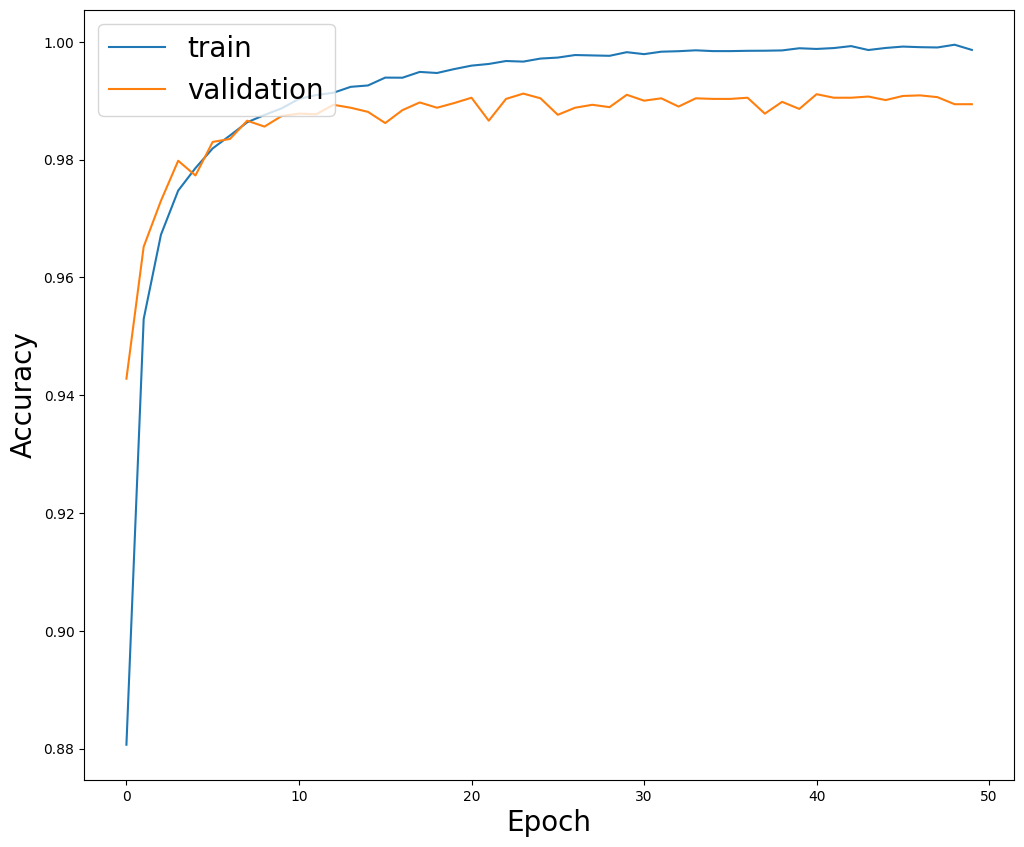

In [ ]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
    plt.legend(["train", "validation"], loc="upper left", prop={'size': 20})

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)

Evaluates the training model

In [ ]:
score = lenet.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04626903682947159
Test accuracy: 0.9894000291824341


Predicts using the training model

1/1 [==============================] - 0s 25ms/step


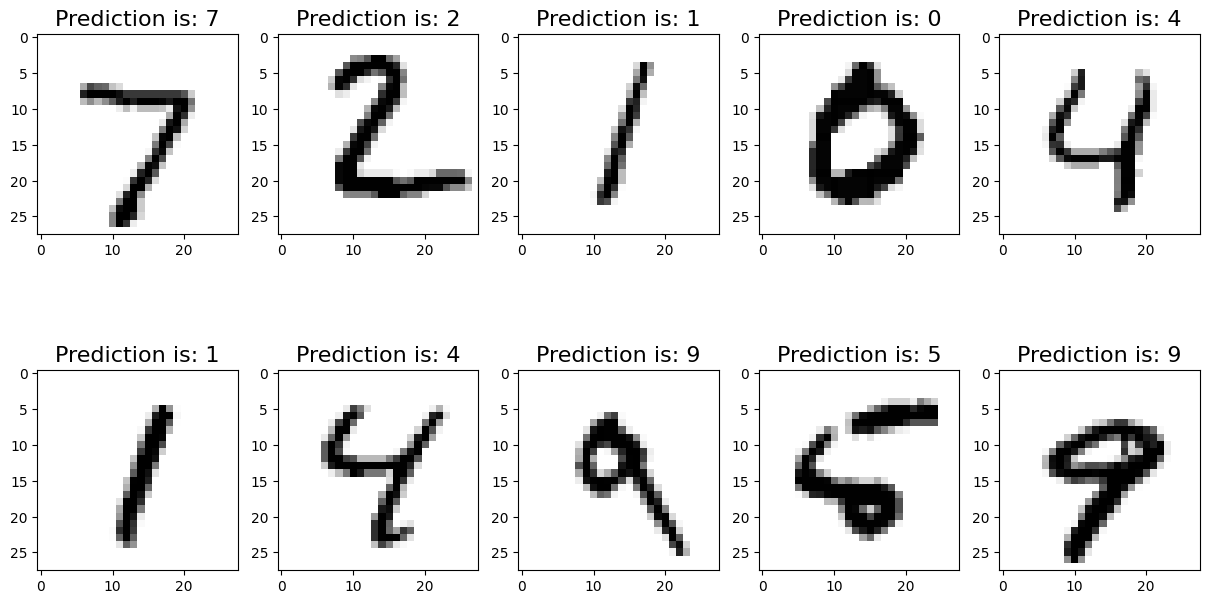

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(15, 8))
ax = ax.flatten()
for i in range(10):
    plottable_image = np.reshape(x_test[i], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].set_title("Prediction is: {}".format(lenet.predict(np.reshape(x_test[i], (1,28,28,1))).argmax()), fontsize=16)

Task 1:

In [ ]:
# Change the number of fillters

def net(loss, optimizer, num_filters_conv1=6, num_filters_conv2=16):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=num_filters_conv1, kernel_size=5, activation='sigmoid',
                               padding='same', input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=num_filters_conv2, kernel_size=5,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(10)])

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

optimizer = tf.optimizers.Adam(learning_rate=2e-4)

lenet_mod_filters = net(loss, optimizer, num_filters_conv1=32, num_filters_conv2=64)
lenet_mod_filters.summary()

history = lenet_mod_filters.fit(x_train, y_train,
                                 epochs=num_epochs,
                                 batch_size=batch_size,
                                 validation_data=(x_test, y_test))


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d_24 (Aver  (None, 14, 14, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 average_pooling2d_25 (Aver  (None, 5, 5, 64)          0         
 agePooling2D)                                                   
                                                                 
 flatten_12 (Flatten)        (None, 1600)              0         
                                                                 
 dense_36 (Dense)            (None, 120)             

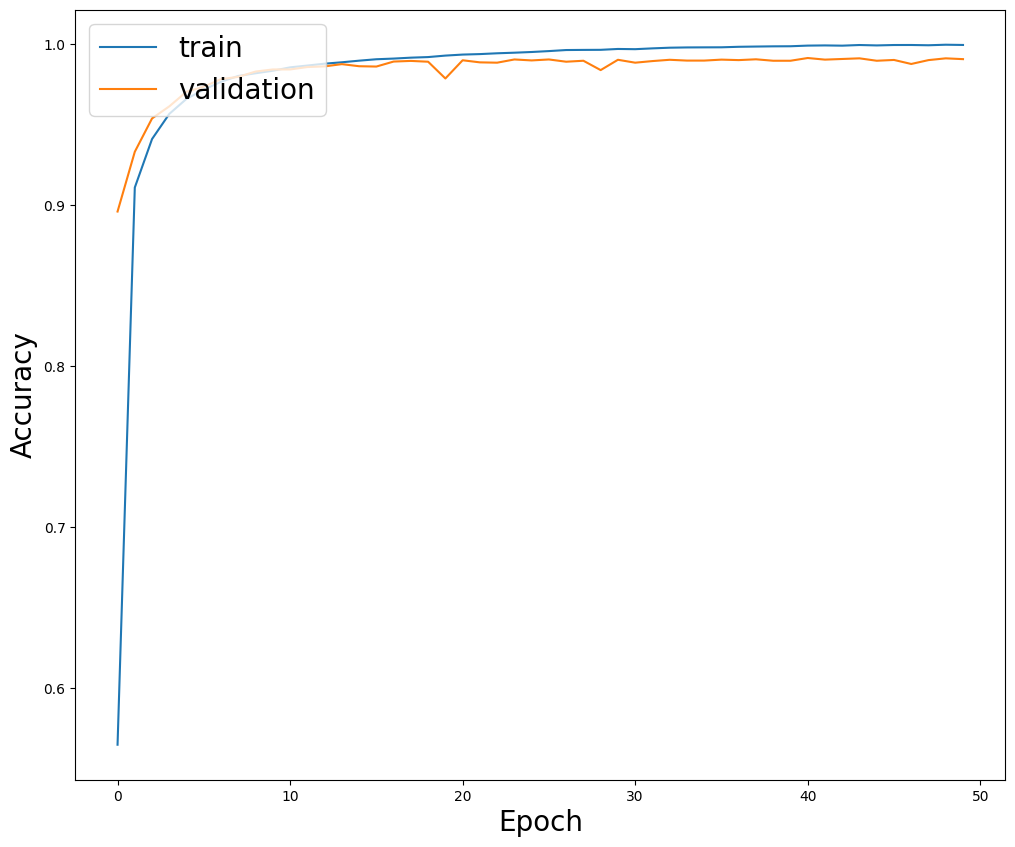

In [ ]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
    plt.legend(["train", "validation"], loc="upper left", prop={'size': 20})

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)

Change the filter size

In [ ]:
#  Redefines the model
def net(loss, optimizer, kernel_size_conv1=(5, 5), kernel_size_conv2=(5, 5)):
    net = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=kernel_size_conv1, activation='sigmoid',
                               padding='same', input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=kernel_size_conv2,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dense(10)])

    net.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return net

lr = 2e-4
num_epochs = 50
batch_size = 32

loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.optimizers.Adam(learning_rate=lr)


In [ ]:
# Change the filter size

lenet_modified_kernel = net(loss, optimizer, kernel_size_conv1=(3, 3), kernel_size_conv2=(3, 3))
lenet_modified_kernel.summary()

history = lenet_modified_kernel.fit(x_train, y_train,
            epochs=num_epochs,
            batch_size=batch_size,
            validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

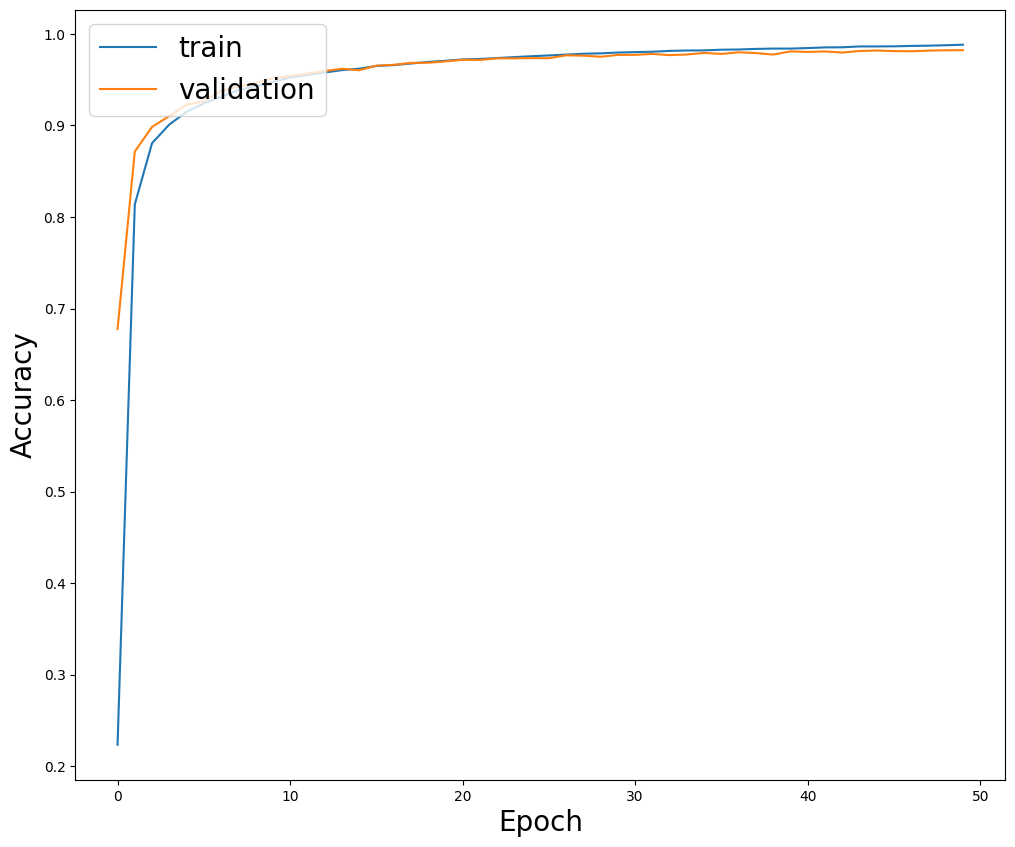

In [ ]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
    plt.legend(["train", "validation"], loc="upper left", prop={'size': 20})

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)

Change the activation function to ReLU

In [ ]:

# Changes the activation function to ReLU

# Redefines the model with ReLU activation
def net(loss, optimizer, kernel_size_conv1=(5, 5), kernel_size_conv2=(5, 5)):
    net = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=kernel_size_conv1, activation='relu',
                               padding='same', input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=kernel_size_conv2,
                               activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(10)])

    net.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return net


lenet_relu = net(loss, optimizer)
lenet_relu.summary()

history = lenet_modified_kernel.fit(x_train, y_train,
            epochs=num_epochs,
            batch_size=batch_size,
            validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

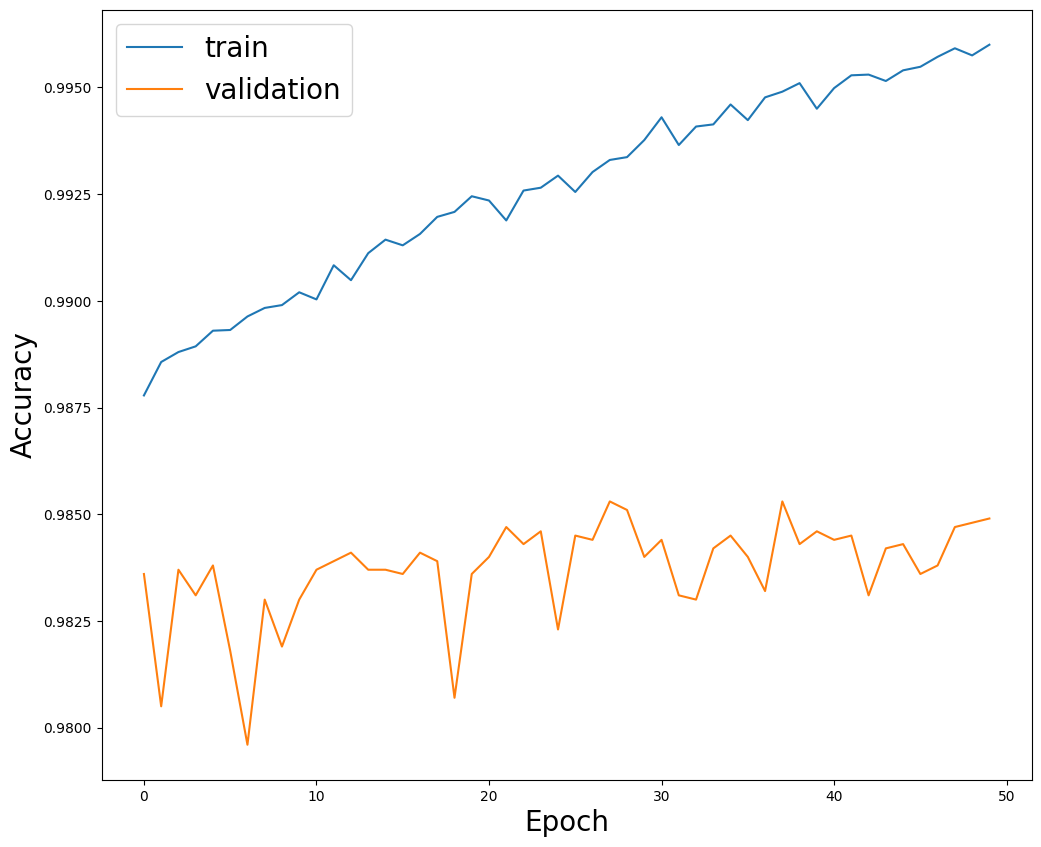

In [ ]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
    plt.legend(["train", "validation"], loc="upper left", prop={'size': 20})

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)

Add the dropout rate

In [ ]:
# Imports the Dropout layer
from tensorflow.keras.layers import Dropout

# Defines the model with dropout
def net(loss, optimizer, dropout_rate=0.5, kernel_size_conv1=5, kernel_size_conv2=5):
    net = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=kernel_size_conv1, activation='sigmoid',
                               padding='same', input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(dropout_rate),  # Adds dropout after the first pooling layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=kernel_size_conv2,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(dropout_rate),  # Adds dropout after the second pooling layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid'),
        tf.keras.layers.Dropout(dropout_rate),  # Adds dropout after the first dense layer
        tf.keras.layers.Dense(84, activation='sigmoid'),
        tf.keras.layers.Dropout(dropout_rate),  # Adds dropout after the second dense layer
        tf.keras.layers.Dense(10)])

    net.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return net

# Net function with dropout rate
dropout_rate = 0.5
lenet_with_dropout = net(loss, optimizer, dropout_rate=dropout_rate)
lenet_with_dropout.summary()

history = lenet_with_dropout.fit(x_train, y_train,
            epochs=num_epochs,
            batch_size=batch_size,
            validation_data=(x_test, y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_30 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 dropout_40 (Dropout)        (None, 14, 14, 6)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_31 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 dropout_41 (Dropout)        (None, 5, 5, 16)        

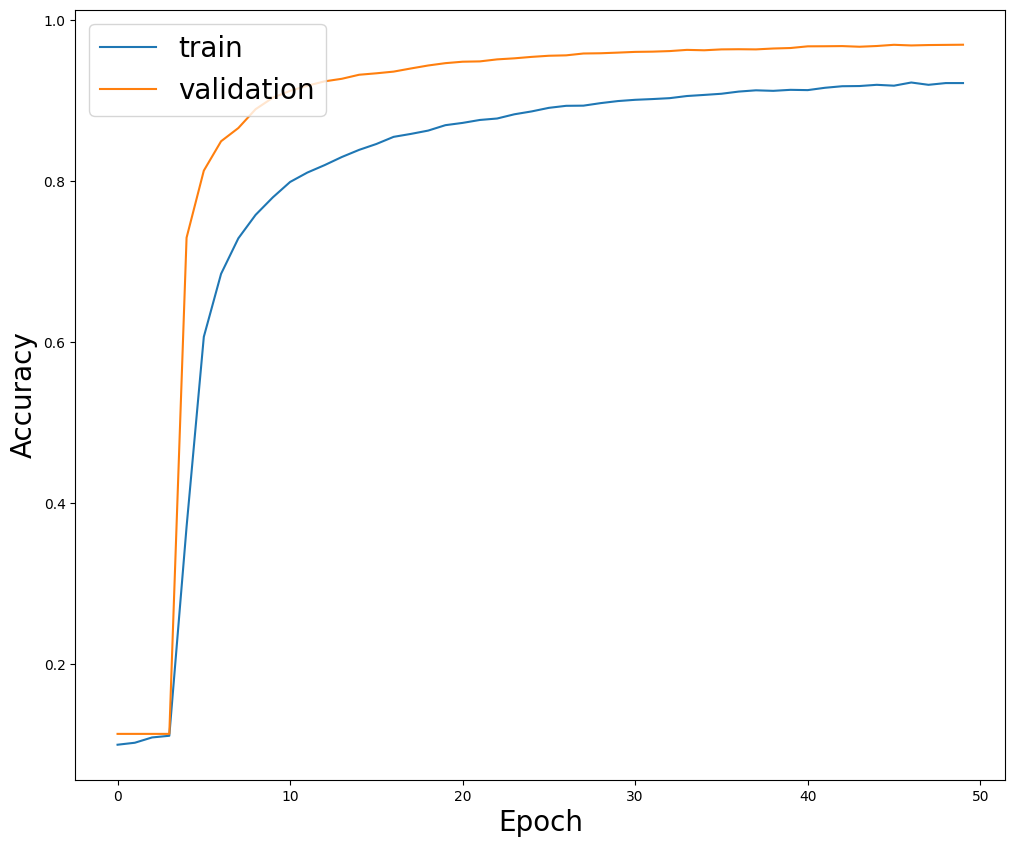

In [ ]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
    plt.legend(["train", "validation"], loc="upper left", prop={'size': 20})

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)

Adds L2 regularization for dense layers (except last one)

In [7]:
# Redefines the model with L2 regularization for dense layers

def net(loss, optimizer, kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_size_conv1=5, kernel_size_conv2=5):
    net = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=kernel_size_conv1, activation='sigmoid',
                               padding='same', input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=kernel_size_conv2,
                               activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='sigmoid', kernel_regularizer=kernel_regularizer),
        tf.keras.layers.Dense(84, activation='sigmoid', kernel_regularizer=kernel_regularizer),
        tf.keras.layers.Dense(10)])

    net.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return net

# Net function with L2 regularization
l2_lambda = 0.0001
lenet_with_l2 = net(loss, optimizer, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))
lenet_with_l2.summary()

history = lenet_with_l2.fit(x_train, y_train,
            epochs=num_epochs,
            batch_size=batch_size,
            validation_data=(x_test, y_test))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

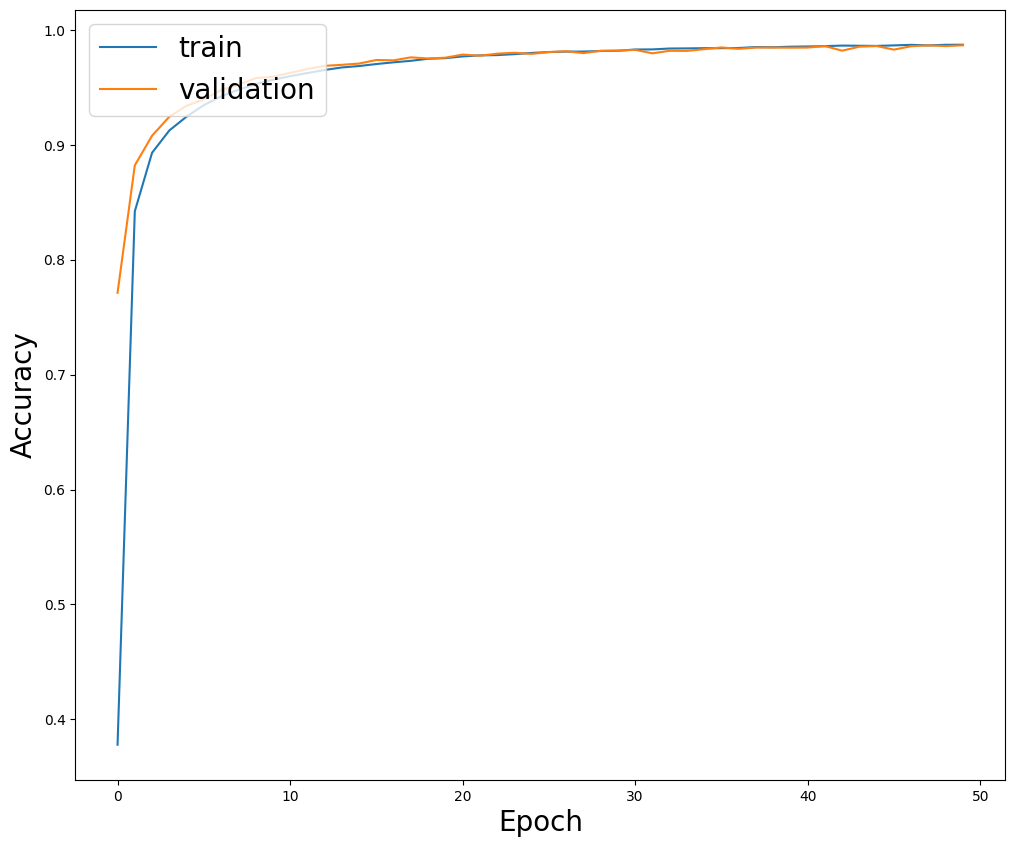

In [8]:
def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
    plt.legend(["train", "validation"], loc="upper left", prop={'size': 20})

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_history(hist)